<a href="https://colab.research.google.com/github/christianbammann/introtoML/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### **Problem 1a**

In [ ]:
# PROBLEM 1: area, bedrooms, bathrooms, stories, parking

x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["parking"].values
y  = df["price"].values
m  = len(y)

print('area =', x1[:5])
print('bedrooms =', x2[:5])
print('bathrooms =', x3[:5])
print('stories =', x4[:5])
print('parking =', x5[:5])
print('price =', y[:5])

area = [7420 8960 9960 7500 7420]
bedrooms = [4 4 3 4 4]
bathrooms = [2 4 2 2 1]
stories = [3 4 2 2 2]
parking = [2 3 2 3 2]
price = [13300000 12250000 12250000 12215000 11410000]


In [ ]:
# 80/20
split = int(0.8 * m)
X_train_raw = np.column_stack((x1[:split], x2[:split], x3[:split], x4[:split], x5[:split]))
y_train = y[:split]
X_test_raw = np.column_stack((x1[split:], x2[split:], x3[split:], x4[split:], x5[split:]))
y_test = y[split:]

In [ ]:
mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)

X_train = (X_train_raw - mean) / std
X_test  = (X_test_raw - mean) / std

# Add bias column like your X_0
X_0_train = np.ones((X_train.shape[0], 1))
X_0_test  = np.ones((X_test.shape[0], 1))

X_train = np.hstack((X_0_train, X_train))
X_test  = np.hstack((X_0_test, X_test))

In [ ]:
# Cost Function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

In [ ]:
# GD
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.T.dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [ ]:
alpha = 0.05
iterations = 1000
theta = np.zeros(X_train.shape[1])

In [ ]:
theta, train_cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

In [ ]:
val_cost = compute_cost(X_test, y_test, theta)

In [ ]:
# Results
print("alpha =", alpha)
print("Final theta =", theta)
print("Final training cost =", train_cost_history[-1])
print("Final validation cost =", val_cost)

alpha = 0.1
Final theta = [5277765.91743119  630664.98342238   85675.7892622   555153.57474789
  459582.80724355  294721.84871837]
Final training cost = 749258111362.1328
Final validation cost = 1066923708068.6779


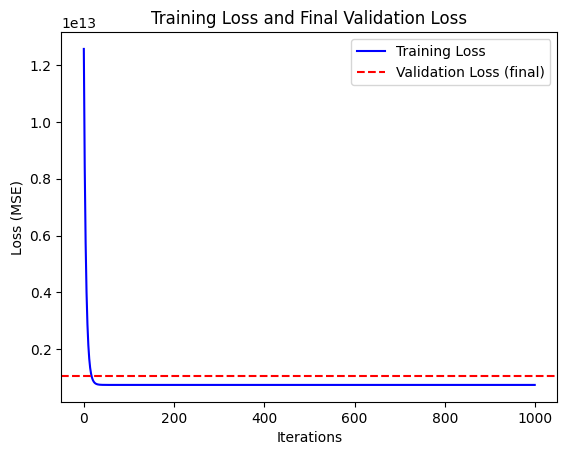

In [ ]:
plt.plot(train_cost_history, color='blue', label="Training Loss")
plt.axhline(y=val_cost, color='red', linestyle='--', label="Validation Loss (final)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss and Final Validation Loss")
plt.legend()
plt.show()



```
# This is formatted as code
```

### **Problem 1b**

In [142]:
df["mainroad"] = df["mainroad"].map({"yes": 1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes": 1, "no": 0})
df["basement"] = df["basement"].map({"yes": 1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes": 1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes": 1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes": 1, "no": 0})

In [143]:
x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["mainroad"].values
x6 = df["guestroom"].values
x7 = df["basement"].values
x8 = df["hotwaterheating"].values
x9 = df["airconditioning"].values
x10 = df["parking"].values
x11 = df["prefarea"].values
y = df["price"].values
m = len(y)

In [144]:
X_raw = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))

split = int(0.8 * m)
X_train_raw, X_test_raw = X_raw[:split], X_raw[split:]
y_train, y_test = y[:split], y[split:]

In [145]:
mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)
X_train = (X_train_raw - mean) / std
X_test = (X_test_raw - mean) / std

In [146]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [147]:
theta = np.zeros(X_train.shape[1])
alpha = 0.05
iterations = 1000
theta, train_cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
val_cost = compute_cost(X_test, y_test, theta)


In [148]:
print("Final theta =", theta)
print("Final training cost =", train_cost_history[-1])
print("Final validation cost =", val_cost)

Final theta = [5277765.91743119  507513.2017684    81263.23957404  517961.71194389
  403175.93726111  149828.02227705  116529.41075528  156559.89418138
  194204.03263482  377745.34167083  244926.39593712  242363.68004537]
Final training cost = 594452090549.0131
Final validation cost = 578216996173.877


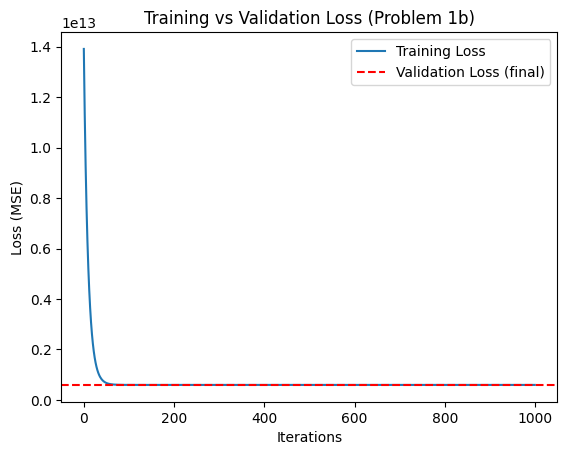

In [149]:
plt.plot(train_cost_history, label="Training Loss")
plt.axhline(y=val_cost, color='r', linestyle='--', label="Validation Loss (final)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss (Problem 1b)")
plt.legend()
plt.show()

### **Problem 2a**

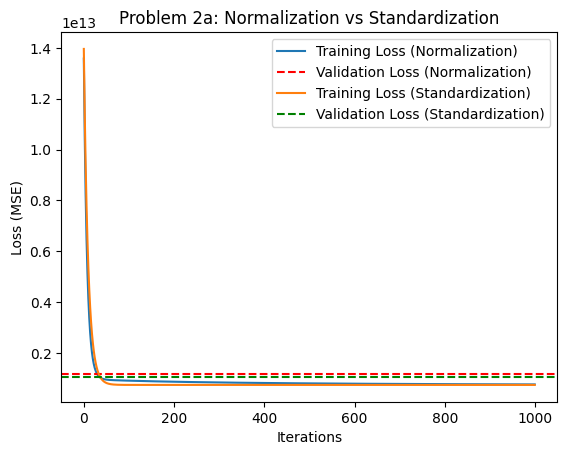

Normalization - Final theta: [3199208.7565915  3020176.70280826  918910.28306655 2466286.440925
 1564119.03318585 1246864.5149557 ]
Normalization - Final training cost: 769091424505.219
Normalization - Final validation cost: 1195787713768.2383
Standardization - Final theta: [5277765.91743118  630664.98342238   85675.7892622   555153.57474788
  459582.80724355  294721.84871837]
Standardization - Final training cost: 749258111362.1329
Standardization - Final validation cost: 1066923708068.6721


In [150]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")

x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["parking"].values
y = df["price"].values
m = len(y)

split = int(0.8 * m)
X_train_raw = np.column_stack((x1[:split], x2[:split], x3[:split], x4[:split], x5[:split]))
y_train = y[:split]
X_test_raw = np.column_stack((x1[split:], x2[split:], x3[split:], x4[split:], x5[split:]))
y_test = y[split:]

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.T.dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

X_train_norm = (X_train_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))
X_test_norm  = (X_test_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))

X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

theta = np.zeros(X_train_norm.shape[1])
theta_norm, train_cost_norm = gradient_descent(X_train_norm, y_train, theta, 0.05, 1000)
val_cost_norm = compute_cost(X_test_norm, y_test, theta_norm)

mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)
X_train_std = (X_train_raw - mean) / std
X_test_std = (X_test_raw - mean) / std

X_train_std = np.hstack((np.ones((X_train_std.shape[0], 1)), X_train_std))
X_test_std = np.hstack((np.ones((X_test_std.shape[0], 1)), X_test_std))

theta = np.zeros(X_train_std.shape[1])
theta_std, train_cost_std = gradient_descent(X_train_std, y_train, theta, 0.05, 1000)
val_cost_std = compute_cost(X_test_std, y_test, theta_std)

plt.plot(train_cost_norm, label="Training Loss (Normalization)")
plt.axhline(y=val_cost_norm, color='r', linestyle='--', label="Validation Loss (Normalization)")
plt.plot(train_cost_std, label="Training Loss (Standardization)")
plt.axhline(y=val_cost_std, color='g', linestyle='--', label="Validation Loss (Standardization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Problem 2a: Normalization vs Standardization")
plt.legend()
plt.show()

print("Normalization - Final theta:", theta_norm)
print("Normalization - Final training cost:", train_cost_norm[-1])
print("Normalization - Final validation cost:", val_cost_norm)

print("Standardization - Final theta:", theta_std)
print("Standardization - Final training cost:", train_cost_std[-1])
print("Standardization - Final validation cost:", val_cost_std)



```
# This is formatted as code
```
### **Problem 2b**


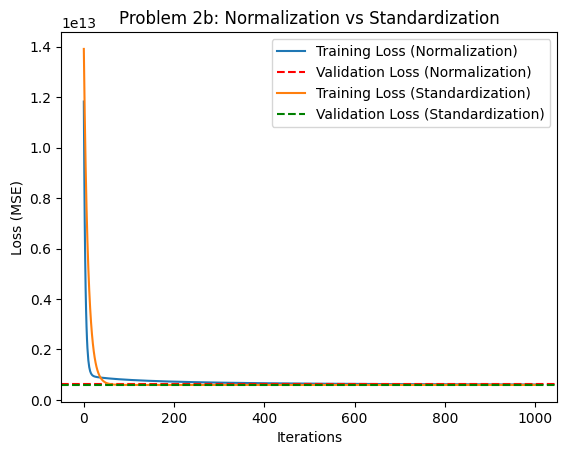

Normalization - Final theta: [2185646.29938691 2305326.96226449  906183.12603946 2327086.60328492
 1352743.07009876  680292.90351394  315256.60652604  318036.52018294
  847480.35733358  819474.16876022 1020826.45584429  571490.79081679]
Normalization - Final training cost: 610624113872.9065
Normalization - Final validation cost: 615481826891.9495
Standardization - Final theta: [5277765.91743119  507513.2017684    81263.23957404  517961.71194389
  403175.93726111  149828.02227705  116529.41075528  156559.89418138
  194204.03263482  377745.34167083  244926.39593712  242363.68004537]
Standardization - Final training cost: 594452090549.0131
Standardization - Final validation cost: 578216996173.877


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")

df["mainroad"] = df["mainroad"].map({"yes": 1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes": 1, "no": 0})
df["basement"] = df["basement"].map({"yes": 1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes": 1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes": 1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes": 1, "no": 0})

x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["mainroad"].values
x6 = df["guestroom"].values
x7 = df["basement"].values
x8 = df["hotwaterheating"].values
x9 = df["airconditioning"].values
x10 = df["parking"].values
x11 = df["prefarea"].values
y = df["price"].values
m = len(y)

X_raw = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))

split = int(0.8 * m)
X_train_raw, X_test_raw = X_raw[:split], X_raw[split:]
y_train, y_test = y[:split], y[split:]

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.T.dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

X_train_norm = (X_train_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))
X_test_norm  = (X_test_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))

X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

theta = np.zeros(X_train_norm.shape[1])
theta_norm, train_cost_norm = gradient_descent(X_train_norm, y_train, theta, 0.05, 1000)
val_cost_norm = compute_cost(X_test_norm, y_test, theta_norm)

mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)
X_train_std = (X_train_raw - mean) / std
X_test_std = (X_test_raw - mean) / std

X_train_std = np.hstack((np.ones((X_train_std.shape[0], 1)), X_train_std))
X_test_std = np.hstack((np.ones((X_test_std.shape[0], 1)), X_test_std))

theta = np.zeros(X_train_std.shape[1])
theta_std, train_cost_std = gradient_descent(X_train_std, y_train, theta, 0.05, 1000)
val_cost_std = compute_cost(X_test_std, y_test, theta_std)

plt.plot(train_cost_norm, label="Training Loss (Normalization)")
plt.axhline(y=val_cost_norm, color='r', linestyle='--', label="Validation Loss (Normalization)")
plt.plot(train_cost_std, label="Training Loss (Standardization)")
plt.axhline(y=val_cost_std, color='g', linestyle='--', label="Validation Loss (Standardization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Problem 2b: Normalization vs Standardization")
plt.legend()
plt.show()

print("Normalization - Final theta:", theta_norm)
print("Normalization - Final training cost:", train_cost_norm[-1])
print("Normalization - Final validation cost:", val_cost_norm)

print("Standardization - Final theta:", theta_std)
print("Standardization - Final training cost:", train_cost_std[-1])
print("Standardization - Final validation cost:", val_cost_std)

### **Problem 3a**


Final theta (L2): [5277765.91743118  629386.94401092   86332.33317045  554128.47558075
  458639.76420473  294528.03230866]
Final training cost (reg): 750415843125.9064
Final validation cost (unreg): 1068777554968.9535


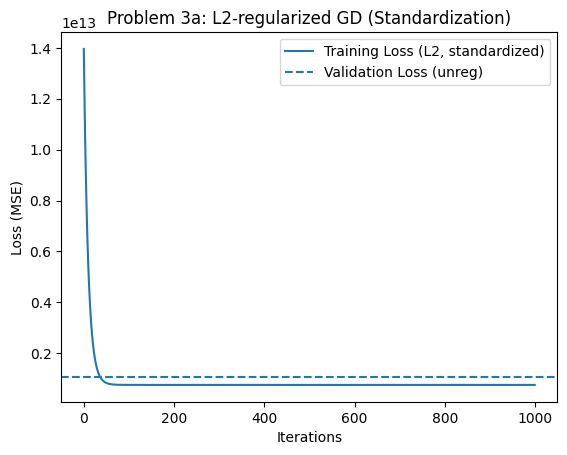

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")

x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["parking"].values
y = df["price"].values
m = len(y)

split = int(0.8 * m)
X_train_raw = np.column_stack((x1[:split], x2[:split], x3[:split], x4[:split], x5[:split]))
y_train = y[:split]
X_test_raw = np.column_stack((x1[split:], x2[split:], x3[split:], x4[split:], x5[split:]))
y_test = y[split:]

mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)
X_train = (X_train_raw - mean) / std
X_test  = (X_test_raw - mean) / std

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test  = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

def compute_cost_reg(X, y, theta, lam):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1/(2*m))*np.sum(errors**2) + (lam/(2*m))*np.sum(theta[1:]**2)
    return J

def gradient_descent_reg(X, y, theta, alpha, iterations, lam):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        grad = (1/m) * X.T.dot(errors)
        reg = (lam/m) * theta
        reg[0] = 0.0
        theta -= alpha * (grad + reg)
        cost_history[i] = compute_cost_reg(X, y, theta, lam)
    return theta, cost_history

alpha = 0.05
iterations = 1000
lam = 1.0
theta = np.zeros(X_train.shape[1])

theta, train_cost_history = gradient_descent_reg(X_train, y_train, theta, alpha, iterations, lam)
val_cost = compute_cost(X_test, y_test, theta)

print("Final theta (L2):", theta)
print("Final training cost (reg):", train_cost_history[-1])
print("Final validation cost (unreg):", val_cost)

plt.plot(train_cost_history, label="Training Loss (L2, standardized)")
plt.axhline(y=val_cost, linestyle='--', label="Validation Loss (unreg)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Problem 3a: L2-regularized GD (Standardization)")
plt.legend()
plt.show()


### **Problem 3b**


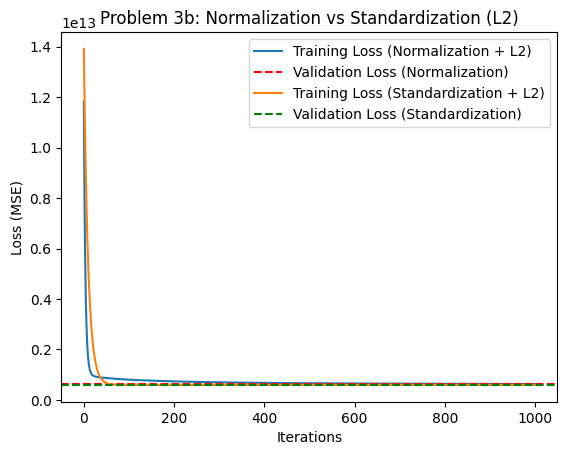

Normalization - Final theta: [2238089.59922967 2210482.23279127  885652.18912497 2245792.89411932
 1335043.56447973  673399.43616751  319378.94468874  313024.7950728
  819866.75463852  822614.66472509 1015749.53559689  571752.89922493]
Normalization - Final training cost: 632015254983.4148
Normalization - Final validation cost: 631353215535.9364
Standardization - Final theta: [5277765.91743119  506569.96399845   81917.84368915  517071.07709046
  402292.92927555  149839.22820022  116691.38198641  155975.6634989
  193682.17453744  377247.68659981  244821.82534593  242058.13913043]
Standardization - Final training cost: 595659636619.8191
Standardization - Final validation cost: 579500045379.7754


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")

df["mainroad"] = df["mainroad"].map({"yes": 1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes": 1, "no": 0})
df["basement"] = df["basement"].map({"yes": 1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes": 1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes": 1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes": 1, "no": 0})

x1 = df["area"].values
x2 = df["bedrooms"].values
x3 = df["bathrooms"].values
x4 = df["stories"].values
x5 = df["mainroad"].values
x6 = df["guestroom"].values
x7 = df["basement"].values
x8 = df["hotwaterheating"].values
x9 = df["airconditioning"].values
x10 = df["parking"].values
x11 = df["prefarea"].values
y = df["price"].values
m = len(y)

X_raw = np.column_stack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))

split = int(0.8 * m)
X_train_raw, X_test_raw = X_raw[:split], X_raw[split:]
y_train, y_test = y[:split], y[split:]

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

def compute_cost_reg(X, y, theta, lam):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1/(2*m))*np.sum(errors**2) + (lam/(2*m))*np.sum(theta[1:]**2)
    return J

def gradient_descent_reg(X, y, theta, alpha, iterations, lam):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        grad = (1/m) * X.T.dot(errors)
        reg = (lam/m) * theta
        reg[0] = 0.0
        theta -= alpha * (grad + reg)
        cost_history[i] = compute_cost_reg(X, y, theta, lam)
    return theta, cost_history

X_train_norm = (X_train_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))
X_test_norm  = (X_test_raw - X_train_raw.min(axis=0)) / (X_train_raw.max(axis=0) - X_train_raw.min(axis=0))

X_train_norm = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

theta = np.zeros(X_train_norm.shape[1])
theta_norm, train_cost_norm = gradient_descent_reg(X_train_norm, y_train, theta, 0.05, 1000, lam=1.0)
val_cost_norm = compute_cost(X_test_norm, y_test, theta_norm)

mean = np.mean(X_train_raw, axis=0)
std = np.std(X_train_raw, axis=0)
X_train_std = (X_train_raw - mean) / std
X_test_std = (X_test_raw - mean) / std

X_train_std = np.hstack((np.ones((X_train_std.shape[0], 1)), X_train_std))
X_test_std = np.hstack((np.ones((X_test_std.shape[0], 1)), X_test_std))

theta = np.zeros(X_train_std.shape[1])
theta_std, train_cost_std = gradient_descent_reg(X_train_std, y_train, theta, 0.05, 1000, lam=1.0)
val_cost_std = compute_cost(X_test_std, y_test, theta_std)

plt.plot(train_cost_norm, label="Training Loss (Normalization + L2)")
plt.axhline(y=val_cost_norm, color='r', linestyle='--', label="Validation Loss (Normalization)")
plt.plot(train_cost_std, label="Training Loss (Standardization + L2)")
plt.axhline(y=val_cost_std, color='g', linestyle='--', label="Validation Loss (Standardization)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Problem 3b: Normalization vs Standardization (L2)")
plt.legend()
plt.show()

print("Normalization - Final theta:", theta_norm)
print("Normalization - Final training cost:", train_cost_norm[-1])
print("Normalization - Final validation cost:", val_cost_norm)

print("Standardization - Final theta:", theta_std)
print("Standardization - Final training cost:", train_cost_std[-1])
print("Standardization - Final validation cost:", val_cost_std)
